<a href="https://colab.research.google.com/github/SetarehForoozan/MachineLearning_Physics/blob/master/Assignment2_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, requests, zipfile
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import mean_squared_error  ## To calculate the loss
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, validation_curve

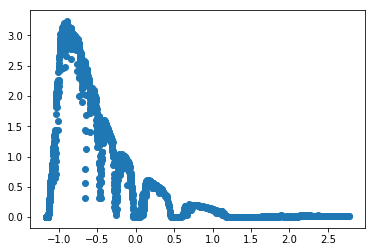

In [0]:
data = pd.read_excel('https://www.pveducation.org/sites/default/files/PVCDROM/Appendices/AM0AM1_5.xls', header=1)
from sklearn.utils import shuffle
data = shuffle(data)
X = data['Wavelength (nm)'].values.reshape(-1,1)
Y = data['Direct+circumsolar W*m-2*nm-1'].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
Y = Y/Y.mean()
plt.scatter(X,Y)
plt.show()


In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import mean_squared_error  ## To calculate the loss
from sklearn.model_selection import learning_curve, validation_curve

In [0]:
%%time

polytransform = PolynomialFeatures(degree = 2)
bbr_reg_poly = LinearRegression(n_jobs = -1)
bbr_reg_poly = Ridge()

n_tot = int(len(data))    ## Total number of samples
pmax = 50              ## Number of points for the learning curve plot
pmin = 1
ps_list = np.arange(pmax) + pmin      ## x-axis on the learning curve

n_avg = 100                ## Number of times to average
poly_std_train = np.zeros(len(ps_list))
poly_std_test = np.zeros(len(ps_list))
poly_score_train = np.zeros(len(ps_list))
poly_score_test = np.zeros(len(ps_list))


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)
k = -1
for ps in ps_list:        ## For different degree of polynomial we try training our estimator
    std_train = 0
    std_test = 0               ## For each, we record the in and out std.
    score_train = 0
    score_test = 0
    k += 1
    polytransform = PolynomialFeatures(degree = ps)
    bbr_reg_poly = LinearRegression(n_jobs = -1)
    bbr_reg_poly = Ridge()
    for i in range(n_avg):
        bbr_reg_poly.fit(polytransform.fit_transform(X_train), Y_train)
        std_train += mean_squared_error(Y_train, bbr_reg_poly.predict(polytransform.fit_transform(X_train)))
        std_test += mean_squared_error(Y_test, bbr_reg_poly.predict(polytransform.fit_transform(X_test)))
        score_train += bbr_reg_poly.score(polytransform.fit_transform(X_train), Y_train)
        score_test += bbr_reg_poly.score(polytransform.fit_transform(X_test), Y_test)
    poly_std_train[k] = std_train / n_avg
    poly_std_test[k] = std_test / n_avg
    poly_score_train[k] = score_train / n_avg
    poly_score_test[k] = score_test / n_avg

CPU times: user 1min 30s, sys: 2.43 s, total: 1min 33s
Wall time: 48.3 s


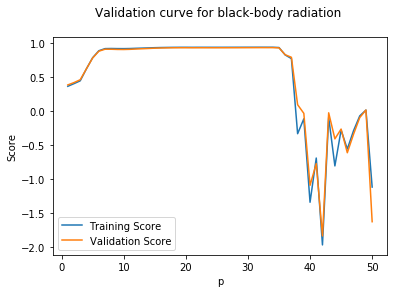

In [0]:
xlabel = 'p'
ylabel = 'Score'
plt_title = 'Validation curve for black-body radiation \n'
fig = plt.figure()
ax2 = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax2.plot(ps_list, poly_score_train, label = 'Training Score')
ax2.plot(ps_list, poly_score_test, label = 'Validation Score')
ax2.legend(loc=0)

plt.show()


In [0]:
ind = (np.where(poly_score_train == max(poly_score_train)))
p_opt = int(ps_list[ind])
print('As we can see from plot above, in about p = {}, we have the peak for score'.format(p_opt))
#

As we can see from plot above, in about p = 32, we have the peak for score


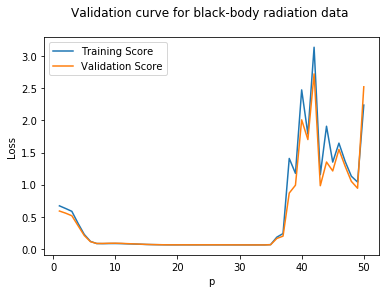

In [0]:
xlabel = 'p'
ylabel = 'Loss'
plt_title = 'Validation curve for black-body radiation data \n'
fig = plt.figure()
ax3 = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax3.plot(ps_list, poly_std_train, label = 'Training Score')
ax3.plot(ps_list, poly_std_test, label = 'Validation Score')
ax3.legend(loc=0)
plt.show()

In [0]:
%%time
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)
polytransform = PolynomialFeatures(degree = 11)
bbr_reg_poly = LinearRegression(n_jobs = -1)
bbr_reg_poly.fit(polytransform.fit_transform(X_train), Y_train)


CPU times: user 3.64 ms, sys: 1.24 ms, total: 4.88 ms
Wall time: 3.55 ms


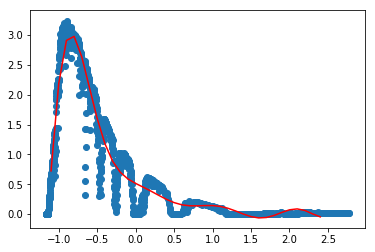

In [0]:
plt.scatter(X_train,Y_train)
x_list = np.arange(-1.1,2.5,0.1).reshape(-1,1)
plt.plot(x_list, bbr_reg_poly.predict(polytransform.fit_transform(x_list)), color = 'red')
plt.show()

In [0]:
%%time
poly_scores = []


polytransform = PolynomialFeatures(degree = p_opt)
bbr_reg_poly = LinearRegression(n_jobs=-1)
bbr_reg_poly = Ridge()

n_tot = int(len(data) )    ## Total number of samples
n_points = 25              ## Number of points for the learning curve plot
ns_list = np.arange(int(n_tot/n_points)-1,n_tot , int(n_tot/n_points) )      ## x-axis on the learning curve
n_avg = 200                ## Number of times to average

for ns in ns_list:        ## For different subset-sizes we try training our estimator
    e_in = 0
    e_out = 0               ## For each, we record the in and out score. 
    for i in range(n_avg):
        sample_data = data.sample(ns)
        X_train, X_test, Y_train, Y_test = train_test_split(sample_data['Wavelength (nm)'].values.reshape(-1,1), sample_data['Direct+circumsolar W*m-2*nm-1'], random_state = 0)
        bbr_reg_poly.fit(polytransform.fit_transform( X_train ), Y_train)
        e_in  += mean_squared_error(Y_train, bbr_reg_poly.predict(polytransform.fit_transform( X_train ) ) )
        e_out += mean_squared_error(Y_test, bbr_reg_poly.predict(polytransform.fit_transform( X_test ) )  )
    poly_scores += [[e_in/n_avg, e_out/n_avg]]
poly_scores = np.array(poly_scores)  


CPU times: user 1min 34s, sys: 27 s, total: 2min 1s
Wall time: 1min 3s


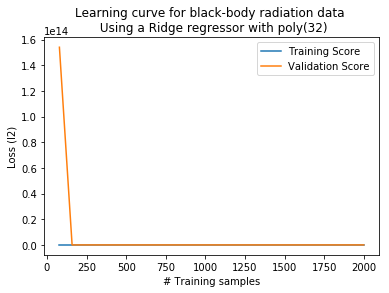

In [0]:
xlabel = '# Training samples'
ylabel = 'Loss (l2)'
plt_title = 'Learning curve for black-body radiation data \n Using a Ridge regressor with poly({})'.format(p_opt)
fig = plt.figure()
ax2 = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax2.plot(ns_list, poly_scores[:,0], label = 'Training Score')
ax2.plot(ns_list, poly_scores[:,1], label = 'Validation Score')
ax2.legend(loc=0)

plt.show()

In [0]:
#polinomial kernel:
import sklearn.metrics.pairwise as smp

polytransform = PolynomialFeatures(degree = 2)
bbr_reg_poly = LinearRegression(n_jobs = -1)
bbr_reg_poly = smp.polynomial_kernel

n_tot = int(len(data))    ## Total number of samples
pmax = 50              ## Number of points for the learning curve plot
pmin = 1
ps_list = np.arange(pmax) + pmin      ## x-axis on the learning curve

n_avg = 100                ## Number of times to average
poly_std_train = np.zeros(len(ps_list))
poly_std_test = np.zeros(len(ps_list))
poly_score_train = np.zeros(len(ps_list))
poly_score_test = np.zeros(len(ps_list))


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)
k = -1
for ps in ps_list:        ## For different degree of polynomial we try training our estimator
    std_train = 0
    std_test = 0               ## For each, we record the in and out std.
    score_train = 0
    score_test = 0
    k += 1
    polytransform = PolynomialFeatures(degree = ps)
    bbr_reg_poly = smp.polynomial_kernel(gamma = ps)
    for i in range(n_avg):
        bbr_reg_poly.fit(polytransform.fit_transform(X_train), Y_train)
        std_train += mean_squared_error(Y_train, bbr_reg_poly.predict(polytransform.fit_transform(X_train)))
        std_test += mean_squared_error(Y_test, bbr_reg_poly.predict(polytransform.fit_transform(X_test)))
        score_train += bbr_reg_poly.score(polytransform.fit_transform(X_train), Y_train)
        score_test += bbr_reg_poly.score(polytransform.fit_transform(X_test), Y_test)
    poly_std_train[k] = std_train / n_avg
    poly_std_test[k] = std_test / n_avg
    poly_score_train[k] = score_train / n_avg
    poly_score_test[k] = score_test / n_avg

TypeError: polynomial_kernel() missing 1 required positional argument: 'X'